In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import seaborn as sns
import math
import matplotlib.pyplot as plt
import warnings

from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE

%matplotlib inline
sns.set(style='darkgrid', palette='deep', font='sans-serif', font_scale=1.3, color_codes=True)

# PART A - 30 Marks

## 1. Data Understanding: [5 Marks]
<ol style="list-style-type: upper-alpha;">
  <li>Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]</li>
  <li>Print Shape and columns of all the 3 DataFrames. [1 Mark]</li>
  <li>Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]</li>
  <li>Print DataTypes of all the 3 DataFrames. [1 Mark]</li>
  <li>Observe and share variation in ‘Class’ feature of all the 3 DaraFrames. [1 Mark]</li>
</ol>

In [2]:
#1A - Read all the 3 CSV files as dataframes and store them into 3 seperate variables.
normal = pd.read_csv("Part1-Normal.csv")
type_h = pd.read_csv("Part1-Type_H.csv")
type_s = pd.read_csv("Part1-Type_S.csv")

In [3]:
#1B - Print shape and columns for each variable

print("Shape of normal DataFrame   : " , normal.shape)
print("Columns of normal DataFrame : " , normal.columns.values, '\n')

print("Shape of type_h DataFrame   : " , type_h.shape)
print("Columns of type_h DataFrame : " , type_h.columns.values, '\n')

print("Shape of type_3 DataFrame   : " , type_s.shape)
print("Columns of type_s DataFrame : " , type_s.columns.values, '\n')

all_columns = pd.DataFrame({'normal':normal.columns.values,'type_h':type_h.columns.values,'type_s':type_s.columns.values},index=['Column 1','Column 2','Column 3','Column 4','Column 5','Column 6','Column 7']).T

all_columns


Shape of normal DataFrame   :  (100, 7)
Columns of normal DataFrame :  ['P_incidence' 'P_tilt' 'L_angle' 'S_slope' 'P_radius' 'S_Degree' 'Class'] 

Shape of type_h DataFrame   :  (60, 7)
Columns of type_h DataFrame :  ['P_incidence' 'P_tilt' 'L_angle' 'S_slope' 'P_radius' 'S_Degree' 'Class'] 

Shape of type_3 DataFrame   :  (150, 7)
Columns of type_s DataFrame :  ['P_incidence' 'P_tilt' 'L_angle' 'S_slope' 'P_radius' 'S_Degree' 'Class'] 



,Column 1,Column 2,Column 3,Column 4,Column 5,Column 6,Column 7
normal,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
type_h,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
type_s,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class


### 1C - Observations on column names of all the 3 DataFrames

- All three DataFrames has 7 Columns
- All column titles are excatly same


In [4]:
#1D - Print DataTypes of all the 3 DataFrames.

print("Data types of Normal:")
print(normal.dtypes)
print("----------------------")

print("Data types of Type_H:")
print(type_h.dtypes)
print("----------------------")

print("Data types of Type_S:")
print(type_s.dtypes)
print("----------------------")


Data types of Normal:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
----------------------
Data types of Type_H:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
----------------------
Data types of Type_S:
P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object
----------------------


In [5]:
#1E - Observe and share variation in ‘Class’ feature of all the 3 DaraFrames

print("Class Feature of Normal:")
print(normal['Class'].value_counts())
print("----------------------")

print("Class Feature of Type_H:")
print(type_h['Class'].value_counts())
print("----------------------")

print("Class Feature of Type_S:")
print(type_s['Class'].value_counts())
print("----------------------")

Class Feature of Normal:
Class
Normal    73
Nrmal     27
Name: count, dtype: int64
----------------------
Class Feature of Type_H:
Class
Type_H    37
type_h    23
Name: count, dtype: int64
----------------------
Class Feature of Type_S:
Class
Type_S    133
tp_s       17
Name: count, dtype: int64
----------------------


### Observations for Class feature for all three datasets

- All rows of Normal DataFrame should have class as 'Normal'
    - However, out of 100 data rows, 73 rows class values are "Normal" and 27 values are "Nrml". This is looks like spelling mistakes - all values should be "Normal"
- All rows of Type_H DataFrame should have class as 'Type_H'
    - However, out of 60 data rows, 37 rows class values are "Type_H" and 23 values are "type_h". This is looks like typing mistakes - all values should be "Type_H"
- All rows of Type_S DataFrame should have class as 'Type_S'
    - However, out of 150 data rows, 133 rows class values are "Type_S" and 17 values are "tp_s". This is looks like typing/spelling mistakes - all values should be "Type_S"



## 2. Data Preparation and Exploration: [5 Marks]
<ol style="list-style-type: upper-alpha;">
  <li>Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Mark]</li>
  <li>Combine all the 3 DataFrames to form a single DataFrame [1 Marks]</li>
  <li>Print 5 random samples of this DataFrame [1 Marks]</li>
  <li>Print Feature-wise percentage of Null values. [1 Mark]</li>
  <li>Check 5-point summary of the new DataFrame. [1 Mark]</li>
</ol>

In [6]:
#2A - Unify all the variations in Class feature for all the 3 DataFrames

#Make Class label as 'Normal' for all rows of Normal DataFrame

normal['Class'] = "Normal"

#Make Class label as 'Type_H' for all rows of type_h DataFrame

type_h['Class'] = 'Type_H'

#Make Class label as 'Type_S' for all rows of type_s DataFrame

type_s['Class'] = 'Type_S'

In [7]:
#2B - Combine all the 3 DataFrames to form a single DataFrame

patient_data = pd.concat([normal, type_h, type_s])



In [8]:
#2C - Print 5 random samples of this DataFrame

patient_data.sample(5)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
138,74.854480,13.909084,62.693259,60.945396,115.208701,33.172255,Type_S
99,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,Normal
80,69.563486,15.401139,74.438497,54.162347,105.067356,29.701211,Type_S
21,54.919443,21.062332,42.200000,33.857110,125.212716,2.432561,Type_H
62,80.074914,48.069531,52.403439,32.005383,110.709912,67.727316,Type_S


In [9]:

#2D - Print Feature-wise percentage of Null values.

percent_null=patient_data.isnull().sum()* 100 / len(patient_data)

pd.DataFrame({'Percentage of null': percent_null})

,Percentage of null
P_incidence,0.0
P_tilt,0.0
L_angle,0.0
S_slope,0.0
P_radius,0.0
S_Degree,0.0
Class,0.0


- There are no null values observed as all percentages above are zero

In [10]:

#2E - Check 5-point summary of the new DataFrame.

patient_data.describe().T


,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


- 5-point summary (min,25%,50%,75%,max) for each feature is displayed above.

## 3. Data Analysis: [10 Marks]
<ol style="list-style-type: upper-alpha;">
  <li>Visualize a heatmap to understand correlation between all features [2 Marks]</li>
  <li>Share insights on correlation. [2 Marks]
    <ol style="list-style-type: upper-alpha;">
       <li>Features having stronger correlation with correlation value.
       <li>Features having weaker correlation with correlation value.</li>
    </ol>
  </li>
  <li>Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]</li>
  <li>Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]</li>
  <li>Visualize a boxplot to check distribution of the features and share insights. [2 Marks]</li>
</ol>

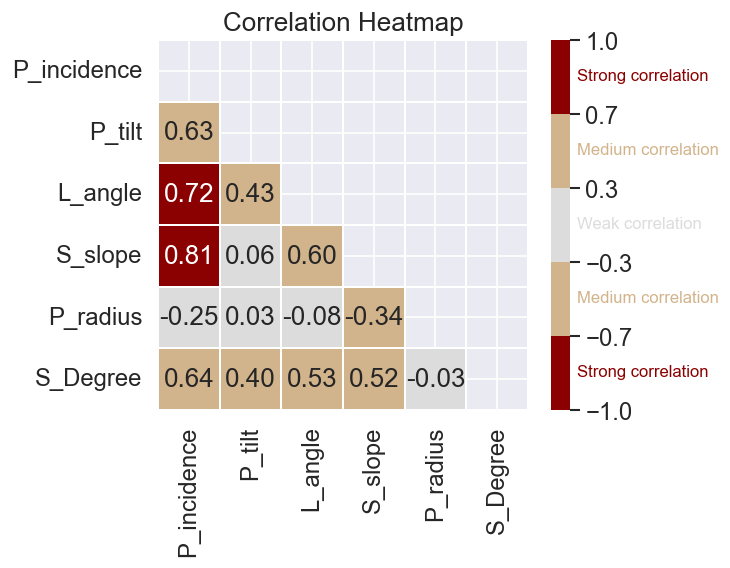

In [11]:
#3A - Visualize a heatmap to understand correlation between all features of combined DataFrame

corr = patient_data.corr(numeric_only=True)

fig=plt.figure(dpi = 120,figsize= (5,4))
ax = fig.add_subplot()

mask= np.triu(np.ones_like(corr))

#Show the heatmap with strong, medium and weak correlations
cmap = colors.ListedColormap(['darkred','tan','gainsboro', 'tan', 'darkred'])
bounds=[-1, -0.7, -0.3, 0.3, 0.7, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

sns.heatmap(corr, mask=mask, square=True, cmap=cmap, norm=norm, lw=1, fmt = ".2f", annot=True, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')

#Show the legends of strong, medium and weak correlations
ax.text(6.8, 0.65, 'Strong correlation',color='darkred', fontsize = 10)
ax.text(6.8, 1.85, 'Medium correlation',color='tan', fontsize = 10)
ax.text(6.8, 3.05, 'Weak correlation',color='gainsboro', fontsize = 10)
ax.text(6.8, 4.25, 'Medium correlation',color='tan', fontsize = 10)
ax.text(6.8, 5.45, 'Strong correlation',color='darkred', fontsize = 10)

plt.show()


### 3B - Insights on the correlation between features

### Assumptions to separate stronger, weaker and moderate correlations:
- Coefficient between −0.3 and +0.3 = weak correlation.
- Coefficient less than −0.7 or greater than +0.7 = strong correlation.
- Coefficient between −0.3 and −0.7 or between +0.3 and +0.7 = moderate correlation.

#### Features having **stronger correlation** (correlations >= 0.7 and <= -0.7)

- *P_incidence* and *S_slope* with correlation value 0.81 (positive correlation)
- *P_incidence* and *L_angle* with correlation value 0.72 (positive correlation)

#### Features having **moderate correlation** (correlations between 0.3 and 0.7 and -0.7 and -0.3)

- *P_incidence* and *S_Degree* with correlation value 0.64 (positive correlation)
- *P_incidence* and *P_tilt* with correlation value 0.63 (positive correlation)
- *L_angle* and *S_slope* with correlation value 0.60 (positive correlation)
- *L_angle* and *S_Degree* with correlation value 0.53 (positive correlation)
- *S_slope* and *S_Degree* with correlation value 0.52 (positive correlation)
- *P_tilt* and *L_angle* with correlation value 0.43 (positive correlation)
- *P_tilt* and *S_Degree* with correlation value 0.40 (positive correlation)
- *S_slope* and *P_radius* with correlation value -0.34 (negative correlation)

#### Features having **weak correlation** (correlations betwen -0.3 to 0.3)

- *P_incidence* and *P_radius* with correlation value -0.25 (negative correlation)
- *L_angle* and *S_Degree* with correlation value -0.08 (negative correlation)
- *P_tilt* and *S_slope* with correlation value -0.06 (negative correlation)
- *P_tilt* and *P_radius* with correlation value 0.03 (positive correlation)
- *P_radius* and *S_Degree* with correlation value -0.03 (negative correlation)


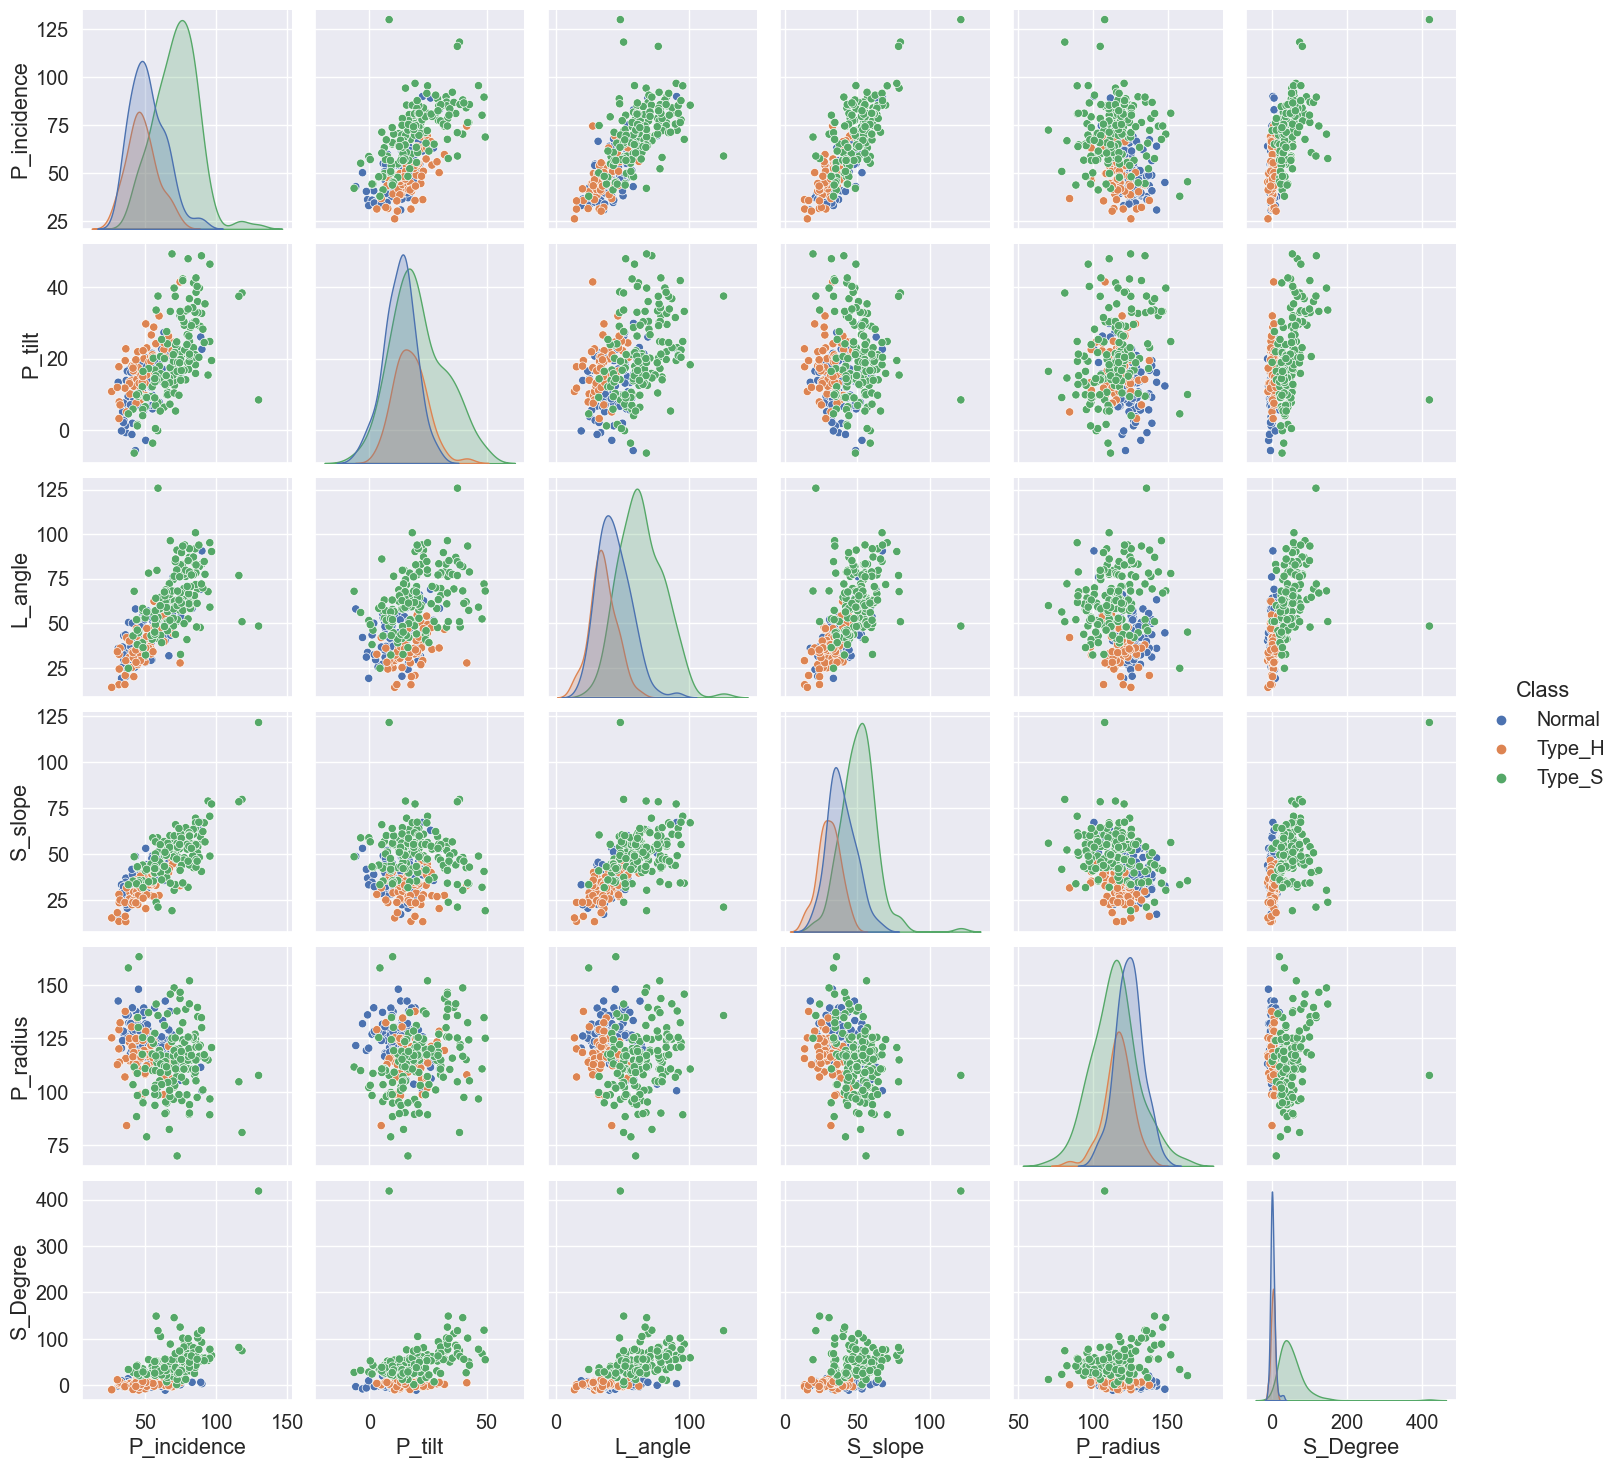

In [12]:
#3C - Visualize a pairplot with 3 classes distinguished by colors for the combined dataframe

warnings.filterwarnings("ignore", message="The figure layout has changed to tight")
sns.pairplot(patient_data,hue='Class')
plt.show()


### Insight of pairplot with 'Class'

- Along the diagonal we can see distribution of variable for three classes are all normal distribution, but each class having its own distrbution.
- It is evident that Type_S class is more compared to other two
- Normal class has higher values compared to Type_H
- From the plot, it is evident that P_tilt, L_angle and S_slope has a clear positive corelation with all classes, even S_Degree also have some slight postive corelation.
- We can find few outliers in each plots
- there is no corelation of classes with P_radius is evident.

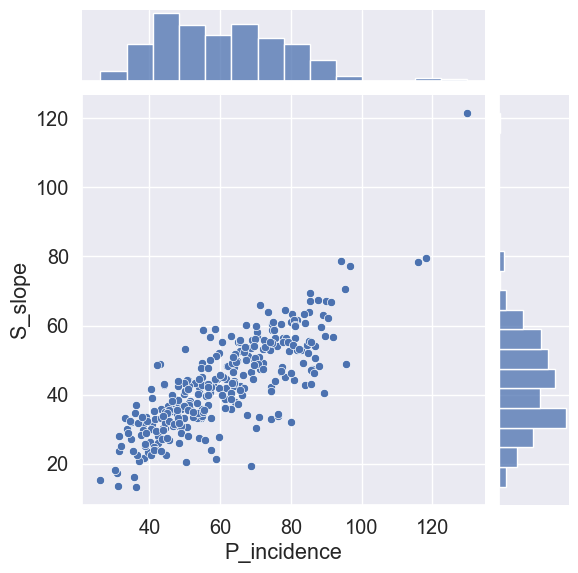

In [13]:
# 3D - Visualize a jointplot for ‘P_incidence’ and ‘S_slope’

sns.jointplot(x=patient_data['P_incidence'], y=patient_data['S_slope'])

plt.show()

### Insights from Jointplot of P_incidence and S_slope

- S_Slope data looks normally distributed
- P_incidence data also looks normally distributed
- It is evident from the plot that P_incidence and S_slope are postively corelated
- There is one clear outlier (beyoond 120,120), and possibly couple of other outliers aroud (120,80)

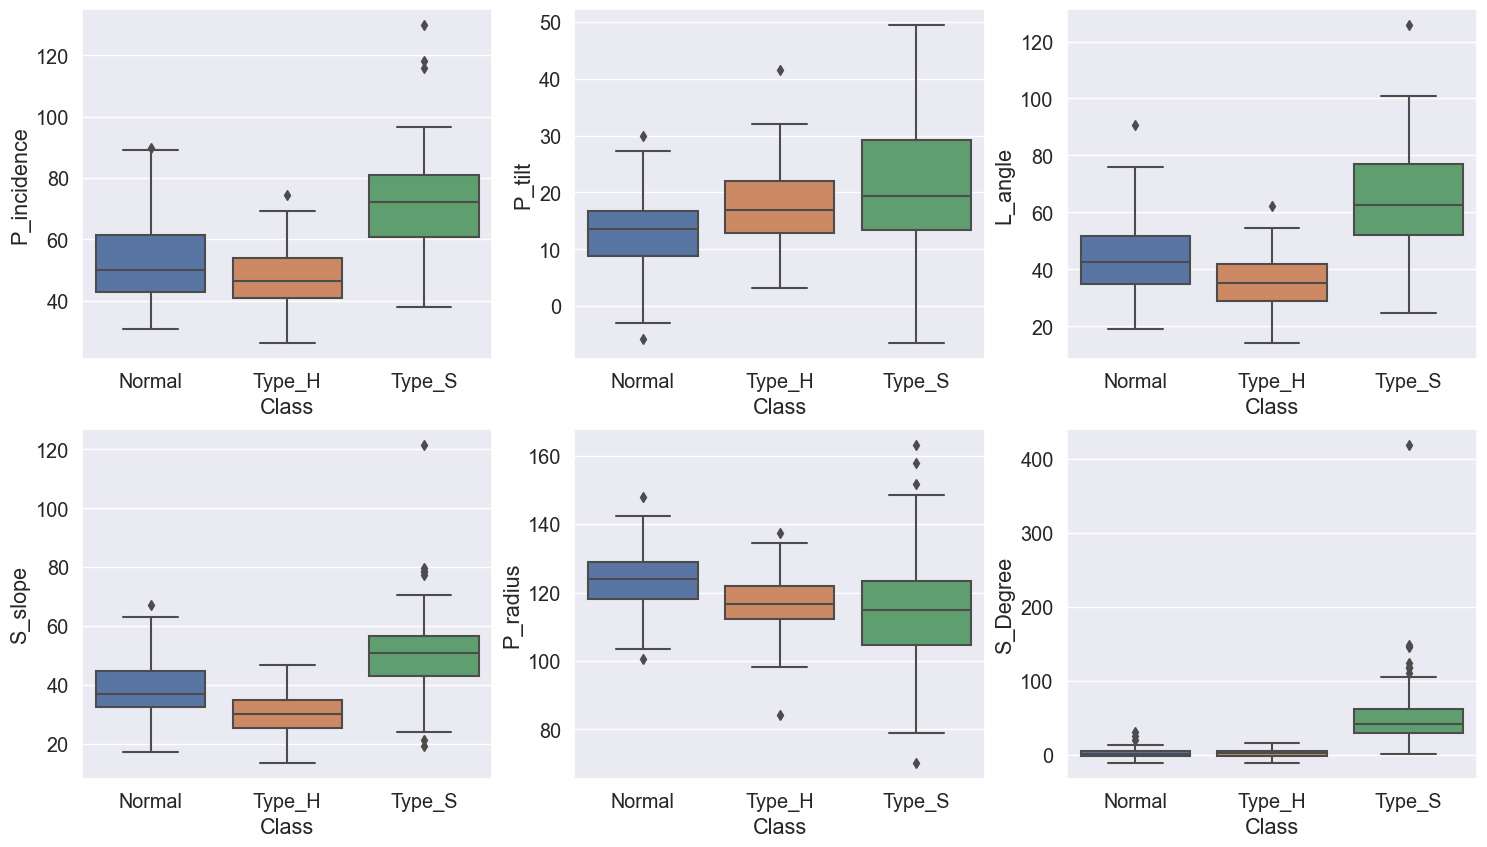

In [14]:

#3E - Visualize a boxplot to check distribution of the features

ax_rows=2
ax_columns=3
fig, axes = plt.subplots(ax_rows, ax_columns, figsize=(18, 10))

fignum=0
for y in ['P_incidence','P_tilt','L_angle','S_slope','P_radius','S_Degree']:
    sns.boxplot(ax=axes[fignum//ax_columns, fignum%ax_columns],data=patient_data, x='Class',  y=y)
    fignum += 1

plt.show()


### Insights from Boxplots

#### P_incidence vs Class

- P_incidence Value is larger for Type_S Class. We can see some extreme values as well
- Normal Value is slightly higher than Type_H

#### P_tilt vs Class

- Mean of Type_S is slightly higher than rest two
- Few cases Normal and Type_H also has huge values

#### L_angle vs Class

- L_Angle has higher value for Type_S Class
- We can see Normal class has higher values compared to type_H class
- Each class contains one outlier

#### S_slope vs Class

- S_slope has huge values for Type_S class
- Normal class has high s_slope compared to Type_H

#### P_radius vs Class

- We can see P_radius value is more for Normal Class
- There is some extreme values for Type_s class
- All classes has higher and lower Value

#### S_Degree vs Class

- S_Degree has extreme values for type_S Class
- Few Normal class also has huge values for S_Degree

## 4. Model Building: [6 Marks]
<ol style="list-style-type: upper-alpha;">
  <li>Split data into X and Y. [1 Marks]</li>
  <li>Split data into train and test with 80:20 proportion. [1 Marks]</li>
  <li>Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]</li>
  <li>Print all the possible performance metrics for both train and test data. [2 Marks]</li>
</ol>

In [15]:
#4A - split data into X and y

#first conver 'Class' column as category column
patient_data['Class'] = patient_data.Class.astype('category')

#Then encode the target using label encoder

le=LabelEncoder()
patient_data['Class']=le.fit_transform(patient_data['Class'])

X = patient_data.drop(labels= "Class" , axis = 1)
y = patient_data["Class"]




In [16]:
#4B - Split data into train and test with 80:20 proportion.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=10)


In [17]:
#4C - Train a Supervised Learning Classification base model using KNN classifier.

print("Training KNN with defaults")
print("---------------------------------------------")

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

Training KNN with defaults
---------------------------------------------


KNeighborsClassifier()

Training data Accuracy       : 0.9153
Training data Precision      : 0.8986
Training data Recall         : 0.8935
Training data F1 Score       : 0.8958

Testing data Accuracy  : 0.7097
Testing data Precision : 0.6611
Testing data Recall    : 0.6569
Testing data F1 Score  : 0.6539

[*Note: the precision/recall/f1 scores above are unweighted mean (macro average) of each class level values]



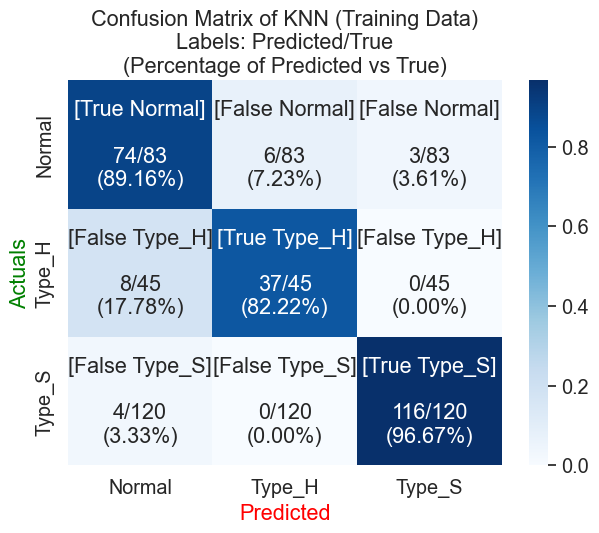

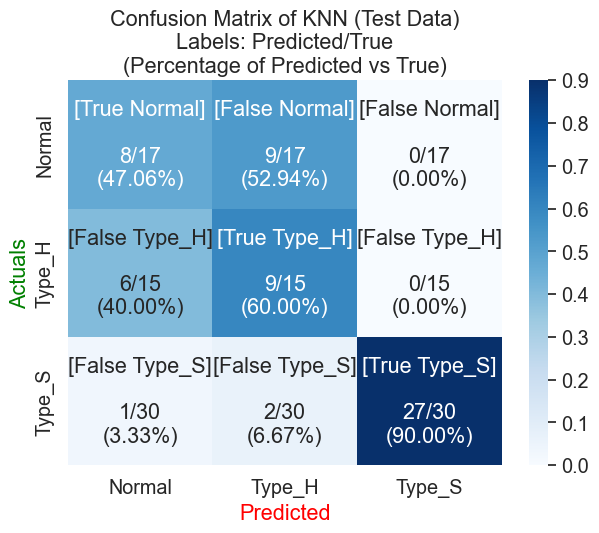


classification  Matrix (Training Data):
               precision    recall  f1-score   support

           0       0.86      0.89      0.88        83
           1       0.86      0.82      0.84        45
           2       0.97      0.97      0.97       120

    accuracy                           0.92       248
   macro avg       0.90      0.89      0.90       248
weighted avg       0.92      0.92      0.92       248


classification  Matrix (Test Data):
               precision    recall  f1-score   support

           0       0.53      0.47      0.50        17
           1       0.45      0.60      0.51        15
           2       1.00      0.90      0.95        30

    accuracy                           0.71        62
   macro avg       0.66      0.66      0.65        62
weighted avg       0.74      0.71      0.72        62




In [18]:
#4D - Print all the possible performance metrics for both train and test data.


predicted_labels_train = knn.predict(X_train)
train_accuracy = metrics.accuracy_score(y_train, predicted_labels_train)
train_precision = metrics.precision_score(y_train, predicted_labels_train, average='macro')
train_recall = metrics.recall_score(y_train, predicted_labels_train,average='macro')
train_f1 = metrics.f1_score(y_train, predicted_labels_train,average='macro')
print("Training data Accuracy       : {0:.4f}".format(train_accuracy))
print("Training data Precision      : {0:.4f}".format(train_precision))
print("Training data Recall         : {0:.4f}".format(train_recall))
print("Training data F1 Score       : {0:.4f}".format(train_f1))

predicted_labels_test = knn.predict(X_test)
test_accuracy = metrics.accuracy_score(y_test, predicted_labels_test)
test_precision = metrics.precision_score(y_test, predicted_labels_test,average='macro')
test_recall = metrics.recall_score(y_test, predicted_labels_test,average='macro')
test_f1 = metrics.f1_score(y_test, predicted_labels_test,average='macro')
print()
print("Testing data Accuracy  : {0:.4f}".format(test_accuracy))
print("Testing data Precision : {0:.4f}".format(test_precision))
print("Testing data Recall    : {0:.4f}".format(test_recall))
print("Testing data F1 Score  : {0:.4f}".format(test_f1))

print()
print("[*Note: the precision/recall/f1 scores above are unweighted mean (macro average) of each class level values]")
print()

def plot_cm_patient_data(X, y, title):
    predicted_labels = knn.predict(X)
    cm = metrics.confusion_matrix(y, predicted_labels, labels=[0,1,2])

    true_normal=y.value_counts()[0]
    true_h=y.value_counts()[1]
    true_s=y.value_counts()[2]
    
    trues = [true_normal,true_normal,true_normal,true_h,true_h,true_h,true_s,true_s,true_s]
    pred_pct = ["{0:.2%}".format(value) for value in
                     cm.flatten()/trues]

    df_cm = pd.DataFrame((cm.flatten()/trues).reshape(3,3), index = [i for i in ["Normal","Type_H","Type_S"]],
              columns = [i for i in ["Normal","Type_H","Type_S"]])

    tags = ['True Normal', 'False Normal', 'False Normal', 'False Type_H', 'True Type_H', 'False Type_H', 'False Type_S', 'False Type_S','True Type_S']

    fig=plt.figure(figsize = (7,5))
    ax = fig.add_subplot()

    counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    labels = [f"[{v4}]\n\n{v1}/{v3}\n({v2})" for v1, v2, v3, v4 in
          zip(counts,pred_pct, trues, tags)]
    labels = np.asarray(labels).reshape(3,3)

    sns.heatmap(df_cm, annot=labels ,fmt='', cmap='Blues')

    plt.title('{0}\nLabels: Predicted/True\n(Percentage of Predicted vs True)'.format(title))
    plt.xlabel('Predicted')
    plt.ylabel('Actuals')
    ax.xaxis.label.set_color('red')
    ax.yaxis.label.set_color('green')

    plt.show()

plot_cm_patient_data(X_train,y_train,"Confusion Matrix of KNN (Training Data)")

print()

plot_cm_patient_data(X_test,y_test,"Confusion Matrix of KNN (Test Data)")

print()

print("classification  Matrix (Training Data):\n",metrics.classification_report(y_train,predicted_labels_train))

print()

print("classification  Matrix (Test Data):\n",metrics.classification_report(y_test,predicted_labels_test))

print()


### Observations

- Training accuracy is high vs the test data accuracy is low
    - This is due to overfitting of data
- In test data, Type-S prediction is more accurate than others
- Test data predictions: 
    - Out of 17 True Normal cases 
        - 47.06% correctly predcited
            - 8 cases are predicted correctly
        - 52.94% predcited wrongly 
            - 9 cases are predicted as Type_H
    - Out of 15 True Type_H cases 
        - 60.00% correctly predcited
            - 9 cases are predicted correctly
        - 40% predcited wrongly 
            - 6 cases are predicted as Normal
    - Out of 30 True Type_S cases 
        - 90.00% correctly predcited
            - 27 cases are predicted correctly
        - 10% predcited wrongly 
            - 1 case is predicted as Normal (3.33%)
            - 2 cases are predicted Type_H  (6.67%)
    - Overall Accuracy = 70.97%
            


## 5. Performance Improvement: [4 Marks]
<ol style="list-style-type: upper-alpha;">
  <li>Experiment with various parameters to improve performance of the base model. [2 Marks]</li>
  <li>Clearly showcase improvement in performance achieved. [1 Marks]<br/>For Example:</li>
  <ol style="list-style-type: upper-alpha;">
    <li>Accuracy: +15% improvement</li>
    <li>Precision: +10% improvement.</li>
  </ol>
  <li>Clearly state which parameters contributed most to improve model performance. [1 Marks]</li>
  </li>
</ol>

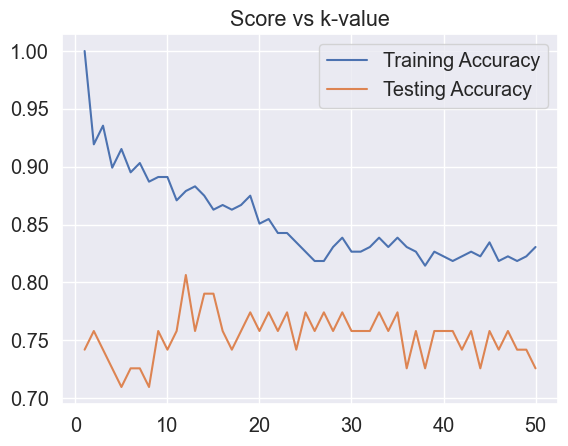

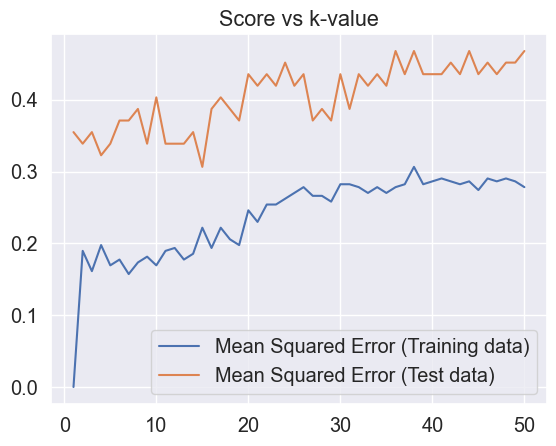

In [19]:
#Let's try to find optimal k-value range

train_score=[]
test_score=[]
train_mse=[]
test_mse=[]
for k in range(1,51):
    KNN = KNeighborsClassifier(n_neighbors= k )
    KNN.fit(X_train, y_train)
    train_score.append(KNN.score(X_train, y_train))
    test_score.append(KNN.score(X_test, y_test))
    train_mse.append(metrics.mean_squared_error(y_train, KNN.predict(X_train)))
    test_mse.append(metrics.mean_squared_error(y_test, KNN.predict(X_test)))

plt.plot(range(1,51),train_score, label = "Training Accuracy")
plt.plot(range(1,51),test_score, label = "Testing Accuracy")
plt.legend()
plt.title("Score vs k-value")
plt.show()

plt.plot(range(1,51),train_mse, label = "Mean Squared Error (Training data)")
plt.plot(range(1,51),test_mse, label = "Mean Squared Error (Test data)")
plt.legend()
plt.title("Score vs k-value")
plt.show()


### Observations

- Accuracy is steadily decreasing for train data (in-sample)
- Accuracy is maximum between k=10-20 for test data
- Mean Squared Error also minimun between k=10-20 for test data


In [20]:
# Check %-age increases for k=10 to 20 and other parameters of KNN to find the best score
best_accuracy = 0
best_k=-1
best_weights=""
best_metric=""
for w in ['uniform','distance']:
    for m in ['minkowski','euclidean','manhattan']:
        for k in range(10,21):
            knn = KNeighborsClassifier(n_neighbors = k, weights = w, metric=m )
            knn.fit(X_train, y_train)
            predicted_labels    = knn.predict(X_test)
            new_accuracy_score  = metrics.accuracy_score(y_test, predicted_labels)
            if new_accuracy_score > best_accuracy:
                best_accuracy = new_accuracy_score
                best_k=k
                best_weights=w
                best_metric=m

print("The parameters found with best accuracy score of {0:5.2f} are : k = {1}, weights = '{2}' and metric = '{3}'".format(best_accuracy, best_k, best_metric, best_weights))



The parameters found with best accuracy score of  0.81 are : k = 12, weights = 'minkowski' and metric = 'uniform'


**_5A_** Conclusion on Experimenting with various parameters to improve performance of KNN:

- Did run KNN with varying three parameters n_neighbor, wieghts and metrics.
- Found the best fitting parameter values:
    - k = 12
    - weights = 'minkowski'
    - metric = 'uniform'

In [21]:
#Check performance improvement

#Run knn with best parameter
knn = KNeighborsClassifier(n_neighbors = best_k, weights = best_weights, metric=best_metric )
knn.fit(X_train, y_train)
predicted_labels    = knn.predict(X_test)
new_accuracy_score  = metrics.accuracy_score(y_test, predicted_labels)
new_precision_score = metrics.precision_score(y_test, predicted_labels,average='macro')
new_recall_score    = metrics.recall_score(y_test, predicted_labels,average='macro')
new_f1_score        = metrics.f1_score(y_test, predicted_labels,average='macro')
print("Percentage increase of Accuracy,precision,recall and f1 with best parameters respectively: {0:5.2f}%, {1:5.2f}%, {2:5.2f}%, {3:5.2f}%".format(
                        ((new_accuracy_score-test_accuracy)*100)/test_accuracy,
                        ((new_precision_score-test_precision)*100)/test_precision,
                        ((new_recall_score-test_recall)*100)/test_recall,
                        ((new_f1_score-test_f1)*100)/test_f1)
)


Percentage increase of Accuracy,precision,recall and f1 with best parameters respectively: 13.64%, 16.93%, 18.71%, 18.46%


**_5B_** PErformance improvement of best model vs. base model:

With best parameter values:
- Accuracy increase : 13.64%
- Precision increase : 16.93%
- Recall increase : 18.71%
- F1 score increase: 18.46%

_*Note: the precession/recall/f1 scores above are the unweighted mean (macro average) of each class values_

In [22]:
#Let me run the parameters individually

#With k and other defaults
best_accuracy = 0
best_k=-1
for k in range(10,21):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    predicted_labels    = knn.predict(X_test)
    new_accuracy_score  = metrics.accuracy_score(y_test, predicted_labels)
    if new_accuracy_score > best_accuracy:
        best_accuracy = new_accuracy_score
        best_k=k
print("The best k-value found with best accuracy score of {0:5.2f} is : k = {1}".format(best_accuracy, best_k))

#Now try varying wiegths with others as defails
best_accuracy = 0
best_weights=""
for w in ['uniform','distance']:
    knn = KNeighborsClassifier(weights = w)
    knn.fit(X_train, y_train)
    predicted_labels    = knn.predict(X_test)
    new_accuracy_score  = metrics.accuracy_score(y_test, predicted_labels)
    if new_accuracy_score > best_accuracy:
        best_accuracy = new_accuracy_score
        best_weights=w
print("The best weights found with best accuracy score of {0:5.2f} is : weights = '{1}'".format(best_accuracy, best_weights))

#Now try metric
best_accuracy = 0
best_metric=""
for m in ['minkowski','euclidean','manhattan']:
    knn = KNeighborsClassifier(metric=m )
    knn.fit(X_train, y_train)
    predicted_labels    = knn.predict(X_test)
    new_accuracy_score  = metrics.accuracy_score(y_test, predicted_labels)
    if new_accuracy_score > best_accuracy:
        best_accuracy = new_accuracy_score
        best_metric=m

print("The best metric found with best accuracy score of {0:5.2f} is : weights = '{1}'".format(best_accuracy, best_metric))


The best k-value found with best accuracy score of  0.81 is : k = 12
The best weights found with best accuracy score of  0.71 is : weights = 'uniform'
The best metric found with best accuracy score of  0.74 is : weights = 'manhattan'


**_5D_** The parameters contributed most to improve model performance

**Conclusion** : The k-value/n_neighbors parameter contributed most to improve model performance.

# PART B - 30 Marks

## 1. Data Understanding and Preparation: [5 Marks]
<ol style="list-style-type: upper-alpha;">
  <li>Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate variables. [1 Marks]</li>
  <li>Print shape and Column Names and DataTypes of both the Dataframes. [1 Marks] </li>
  <li>Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]</li>
  <li>Change Datatype of below features to ‘Object’ [1 Marks]<br/>
      ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’</li>
</ol>

In [23]:
#1A - Read both the Datasets ‘Data 1’ and ‘Data 2’ as DataFrame and store them into two separate variables.

data1 = pd.read_csv("Part2-Data1.csv")
data2 = pd.read_csv("Part2-Data2.csv")

In [24]:
#1B - Print shape and Column Names and DataTypes of both the Dataframes.

#Define a common functon to print shape and column names and datatypes.
def print_details(df):
    print("Shape: ", df.shape)
    print()
    print("Columns Names: " , df.columns.values)
    print()
    print("Column wise datatypes: ")
    df.info()
    print()


#data1
print("Details of data1 :")
print("-------------------")
print()
print_details(data1)


Details of data1 :
-------------------

Shape:  (5000, 8)

Columns Names:  ['ID' 'Age' 'CustomerSince' 'HighestSpend' 'ZipCode' 'HiddenScore'
 'MonthlyAverageSpend' 'Level']

Column wise datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   int64  
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   int64  
dtypes: float64(1), int64(7)
memory usage: 312.6 KB



In [25]:

#data2
print("Details of data2 :")
print("-------------------")
print()
print_details(data2)

Details of data2 :
-------------------

Shape:  (5000, 7)

Columns Names:  ['ID' 'Mortgage' 'Security' 'FixedDepositAccount' 'InternetBanking'
 'CreditCard' 'LoanOnCard']

Column wise datatypes: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Mortgage             5000 non-null   int64  
 2   Security             5000 non-null   int64  
 3   FixedDepositAccount  5000 non-null   int64  
 4   InternetBanking      5000 non-null   int64  
 5   CreditCard           5000 non-null   int64  
 6   LoanOnCard           4980 non-null   float64
dtypes: float64(1), int64(6)
memory usage: 273.6 KB



In [26]:
#1C - Merge both the Dataframes on ‘ID’ feature to form a single DataFrame

# merging data1 and data2 by ID
# i.e. the rows with common ID's get merged
bank_data = pd.merge(data1, data2, on="ID")
bank_data

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0.0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0.0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0.0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0.0


In [27]:
#1D - Change Datatype of below features to ‘Object’ :
#   ‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’

#Reason: values of these columns are binary (0/1), but the data type is ‘int’/‘float’ which is not expected.

for col in ['CreditCard', 'InternetBanking', 'FixedDepositAccount', 'Security', 'Level', 'HiddenScore']:
    bank_data[col] =  bank_data[col].astype('object')

#Check if done
bank_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   5000 non-null   int64  
 1   Age                  5000 non-null   int64  
 2   CustomerSince        5000 non-null   int64  
 3   HighestSpend         5000 non-null   int64  
 4   ZipCode              5000 non-null   int64  
 5   HiddenScore          5000 non-null   object 
 6   MonthlyAverageSpend  5000 non-null   float64
 7   Level                5000 non-null   object 
 8   Mortgage             5000 non-null   int64  
 9   Security             5000 non-null   object 
 10  FixedDepositAccount  5000 non-null   object 
 11  InternetBanking      5000 non-null   object 
 12  CreditCard           5000 non-null   object 
 13  LoanOnCard           4980 non-null   float64
dtypes: float64(2), int64(6), object(6)
memory usage: 547.0+ KB


## 2. Data Exploration and Analysis: [5 Marks]
<ol style="list-style-type: upper-alpha;">
  <li>Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]</li>
  <li>Check the percentage of missing values and impute if required. [1 Marks] </li>
  <li>Check for unexpected values in each categorical variable and impute with best suitable value. [2 Marks]</li>
</ol>

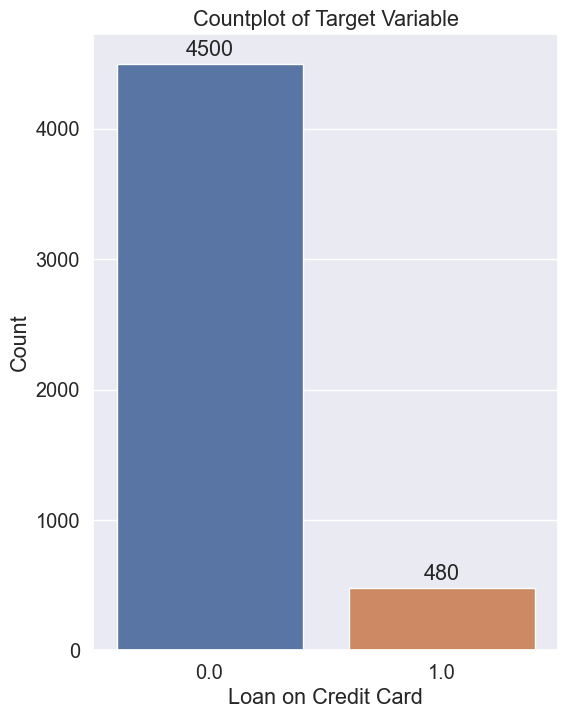

In [28]:
#2A - Visualize distribution of Target variable 'LoanOnCard' and clearly share insights

plt.figure(figsize=(6,8))
# Create countplot
ax = sns.countplot(x=bank_data['LoanOnCard'])

# Add labels and title
ax.set(xlabel='Loan on Credit Card', ylabel='Count', title='Countplot of Target Variable')

# Add data labels on top of each bar
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 10),
                textcoords = 'offset points')

# Show plot
plt.show()

### Insights

- We can clearly see imbalanced class distribution from the above plot. Count is very high for Class'0', while it is very less for Class'1'.

In [29]:
# 2b - Check the percentage of missing values and impute if required.

# Calculate percentage of missing values in each column
percent_missing = bank_data.isnull().sum() * 100 / len(bank_data)
print(percent_missing)

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64


- As the percentage of missing values in target variable 'LoanOnCard' is just 0.4%, I decide to impute the missing values with mode.

In [30]:
# Missing value imputation

bank_data['LoanOnCard'] = bank_data['LoanOnCard'].fillna(bank_data['LoanOnCard'].mode()[0])
bank_data.head()

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0.0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0.0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0.0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0.0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0.0


In [31]:
## Again check for missing values

bank_data.isna().sum().sum()

0

- So, there are no missing values. All missing values in 'LoanOnCard' were replaced with mode.

In [32]:
#2C -  Check for unexpected values in each categorical variable and impute with best suitable value.

categorical_cols = ['HiddenScore','Level', 'Security', 'FixedDepositAccount', 'InternetBanking', 'CreditCard']
for col in categorical_cols:
    print('The unique values in the', col,':', bank_data[col].unique())


The unique values in the HiddenScore : [4 3 1 2]
The unique values in the Level : [1 2 3]
The unique values in the Security : [1 0]
The unique values in the FixedDepositAccount : [0 1]
The unique values in the InternetBanking : [0 1]
The unique values in the CreditCard : [0 1]


- There are no unexpected values in the categorical variables.

## Data Preparation and model building: [10 Marks]
<ol style="list-style-type: upper-alpha;">
  <li>Split data into X and Y. [1 Marks]</li>
  <li>Split data into train and test. Keep 25% data reserved for testing. [1 Marks]</li>
  <li>Train a Supervised Learning Classification base model - Logistic Regression. [2 Marks]</li>
  <li>Print evaluation metrics for the model and clearly share insights. [1 Marks] </li>
  <li>Balance the data using the right balancing technique. [2 Marks] </li>
    <ol style='list-style-type: lower-roman;'>
        <li>Check distribution of the target variable</li>
        <li>Say output is class A : 20% and class B : 80%</li>
        <li>Here you need to balance the target variable as 50:50</li>
        <li>Try appropriate method to achieve the same</li>
    </ol>
   <li>Again train the same previous model on balanced data. [1 Marks] </li>
   <li>Print evaluation metrics and clearly share differences observed. [2 Marks]</li>
  </ol>
</ol>

In [33]:
# 3A - Split data into X and y.

#I shall not use ID and ZipCode as independent variable, as these variables have no impact on the target
X = bank_data.drop(labels=['ID', 'ZipCode', 'LoanOnCard'], axis=1)
y = bank_data['LoanOnCard']

In [34]:
# 3B - Split data into train and test. Keep 25% data reserved for testing.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=365)

In [35]:
# 3C - Train a Supervised Learning Classification base model - Logistic Regression.


lr = LogisticRegression(max_iter=3000) ## with defualt max_iter, convergence warning appears
lr.fit(X_train, y_train)

LogisticRegression(max_iter=3000)

Confusion metrics (Training Data): 
 [[3352   48]
 [ 135  215]]




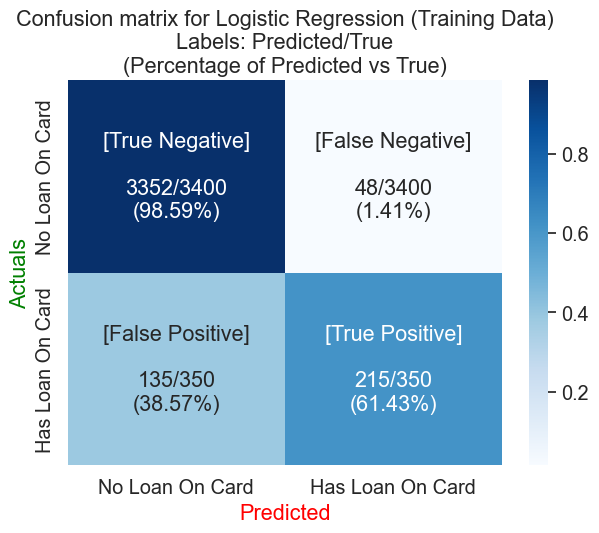

Classification Report (Training Data):  
               precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      3400
         1.0       0.82      0.61      0.70       350

    accuracy                           0.95      3750
   macro avg       0.89      0.80      0.84      3750
weighted avg       0.95      0.95      0.95      3750



ROC_AUC score: 0.8


Confusion metrics (Test Data): 
 [[1107   13]
 [  54   76]]




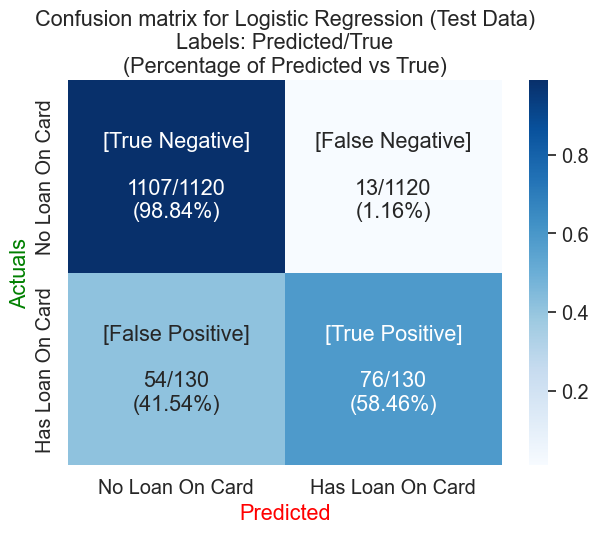

Classification Report (Test Data):  
               precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      1120
         1.0       0.85      0.58      0.69       130

    accuracy                           0.95      1250
   macro avg       0.90      0.79      0.83      1250
weighted avg       0.94      0.95      0.94      1250



ROC_AUC score: 0.79


In [36]:
# 3D - Print evaluation metrics for the model and clearly share insights.

#Plot Confusion metrics
def plot_cm(cm, y_test, title):
    true_no_loan=y_test.value_counts()[0]
    true_loan=y_test.value_counts()[1]

    trues = [true_no_loan,true_no_loan,true_loan,true_loan]
    pred_pct = ["{0:.2%}".format(value) for value in
                         cm.flatten()/trues]

    tags = ['True Negative', 'False Negative', 'False Positive', 'True Positive']

    ax_labels = ["No Loan On Card","Has Loan On Card"]

    df_cm = pd.DataFrame((cm.flatten()/trues).reshape(2,2), index = [i for i in ax_labels],
                  columns = [i for i in ax_labels])


    fig=plt.figure(figsize = (7,5))
    ax = fig.add_subplot()

    counts = ["{0:0.0f}".format(value) for value in
                    cm.flatten()]
    labels = [f"[{v4}]\n\n{v1}/{v3}\n({v2})" for v1, v2, v3, v4 in
              zip(counts,pred_pct, trues, tags)]
    labels = np.asarray(labels).reshape(2,2)

    sns.heatmap(df_cm, annot=labels ,fmt='', cmap='Blues')

    plt.title('{0}\nLabels: Predicted/True\n(Percentage of Predicted vs True)'.format(title))
    plt.xlabel('Predicted')
    plt.ylabel('Actuals')
    ax.xaxis.label.set_color('red')
    ax.yaxis.label.set_color('green')

    plt.show()

#Train Data Metrics

y_pred = lr.predict(X_train)
cm = metrics.confusion_matrix(y_train, y_pred)
print('Confusion metrics (Training Data): \n', cm)
print('\n')

plot_cm(cm, y_train, "Confusion matrix for Logistic Regression (Training Data)")

print('Classification Report (Training Data):  \n', metrics.classification_report(y_train, y_pred))
print('\n')
print('ROC_AUC score:', metrics.roc_auc_score(y_train, y_pred).round(2))

print()
print()

#Test Data Metrics

y_pred = lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion metrics (Test Data): \n', cm)
print('\n')

plot_cm(cm, y_test, "Confusion matrix for Logistic Regression (Test Data)")

print('Classification Report (Test Data):  \n', metrics.classification_report(y_test, y_pred))
print('\n')
print('ROC_AUC score:', metrics.roc_auc_score(y_test, y_pred).round(2))



### Insights
- Training and testing data accuracy are same
- Though the accuracy is 95%, the recall of minority class is very less. So we can say that our model is biased towards majority class - the model is more fit towards no loan class.

In [37]:
#3E - Balance the data using the rigth balancing technique

# Check distribution of target variable
percent_dist_tv = (bank_data["LoanOnCard"].value_counts()/bank_data["LoanOnCard"].value_counts().sum())*100
percent_dist_tv

LoanOnCard
0.0    90.4
1.0     9.6
Name: count, dtype: float64

### Observations
- We can see imbalanced distribution of classes in the target variable.
- 90.4% belong to class'0.0' and 9.6% belong to class'1.0'.
- To overcome this problem I shall use oversampling technique called SMOTE.

In [38]:
#Balance the target variable as 50:50

smote = SMOTE()
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

In [39]:
# again check distribution of target variable on train data

y_train_balanced.value_counts()

LoanOnCard
0.0    3400
1.0    3400
Name: count, dtype: int64

- Now I have balanced the target variable as 50:50.

In [40]:
#3F - Again train the same previous model on balanced data.

lr.fit(X_train_balanced, y_train_balanced)

LogisticRegression(max_iter=3000)

Confusion metrics (Training Data): 
 [[3063  337]
 [  38  312]]




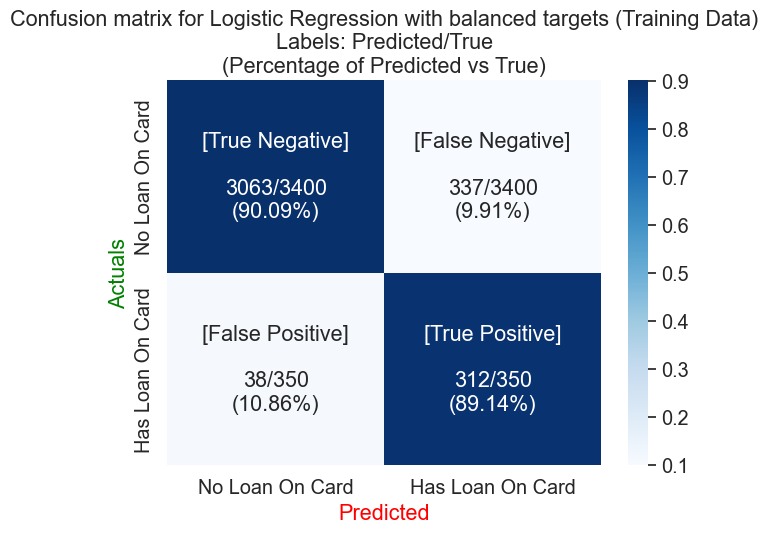

Classification Report (Training Data):  
               precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      3400
         1.0       0.48      0.89      0.62       350

    accuracy                           0.90      3750
   macro avg       0.73      0.90      0.78      3750
weighted avg       0.94      0.90      0.91      3750



ROC_AUC score (Training Data): 0.9
Confusion metrics (Test Data): 
 [[1027   93]
 [  18  112]]




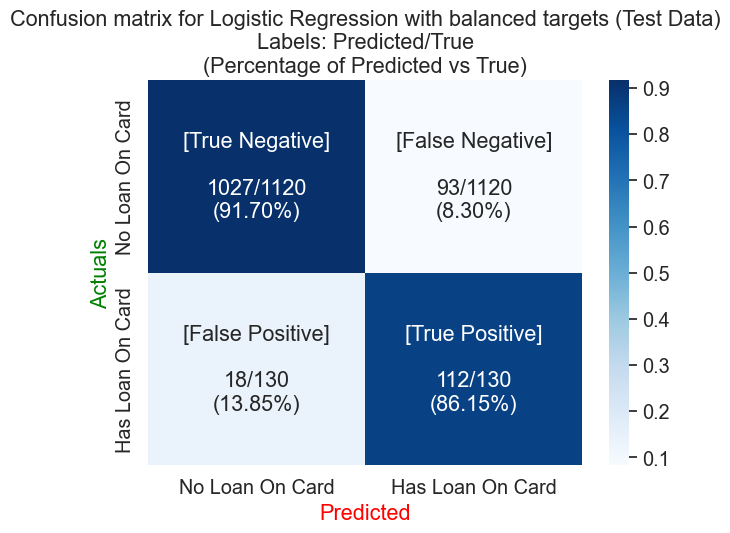

Classification Report (Test Data):  
               precision    recall  f1-score   support

         0.0       0.98      0.92      0.95      1120
         1.0       0.55      0.86      0.67       130

    accuracy                           0.91      1250
   macro avg       0.76      0.89      0.81      1250
weighted avg       0.94      0.91      0.92      1250



ROC_AUC score (Test Data): 0.89


In [41]:
# 3G - Print evaluation metrics and clearly share differences observed.

#Training data metrics
y_pred = lr.predict(X_train)
cm = metrics.confusion_matrix(y_train, y_pred)
print('Confusion metrics (Training Data): \n', cm)
print('\n')

#Plot Confusion metrics
plot_cm(cm,y_train, "Confusion matrix for Logistic Regression with balanced targets (Training Data)")

print('Classification Report (Training Data):  \n', metrics.classification_report(y_train, y_pred))
print('\n')
print('ROC_AUC score (Training Data):', metrics.roc_auc_score(y_train, y_pred).round(2))

#Test data metrics
y_pred = lr.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
print('Confusion metrics (Test Data): \n', cm)
print('\n')

#Plot Confusion metrics
plot_cm(cm,y_test, "Confusion matrix for Logistic Regression with balanced targets (Test Data)")

print('Classification Report (Test Data):  \n', metrics.classification_report(y_test, y_pred))
print('\n')
print('ROC_AUC score (Test Data):', metrics.roc_auc_score(y_test, y_pred).round(2))

### Observations
- The accuracy has decreased a little bit, but the recall score has increased for the minority class.
- ROC_AUC score has improved from 0.79 to 0.89
- Training and Testing data performance is comparable, in fact, test data performed well.

## 4. Performance Improvement: [10 Marks]
<ol style="list-style-type: upper-alpha;">
  <li>Train a base model each for SVM, KNN [4 Marks]</li>
  <li>Tune parameters for each of the models wherever required and finalize a model. [3 Marks]</li>
  <li>Print evaluation metrics for final model. [1 Marks] </li>
  <li>Share improvement achieved from base model to final model. [2 Marks] </li>
</ol>

In [42]:
# 4A - Train a base model each for SVM, KNN.

# SVM base model

svm_base_model = SVC()
svm_base_model.fit(X_train, y_train)

# KNN base model

knn_base_model = KNeighborsClassifier()
knn_base_model.fit(X_train, y_train)

KNeighborsClassifier()

In [43]:
# 4B - Tune parameters for each of the models wherever required and finalize a model.

# Tune parameters for svm model with default kernel 'rbf' using different values of 'C' and 'gamma'
best_c = -1
best_gamma = -1
best_kernel = ""
best_accuracy = 0

power_ranges = [-3,-2,-1,0,1,2,3]
#I shall use only two kernels: 'rbf' and 'sigmoid', as there are many features, so data may not be linearly seprable and running with 'linear' or 'poly' kernels will take too much time and
#those kernels will not give best results. Moreover, 'poly' must be used with correct degree. Also, we can not use 'precomputed' kernels as we need square metrics for same.
#For sigmoid, I will use default coef0, i.e. 0.
kernels = ['rbf', 'sigmoid' ] 

for pc in power_ranges:
    for pg in power_ranges:
        for kernel in kernels:
            C=math.pow(10, pc)
            gamma=math.pow(10, pg)
            svm_model = SVC(C=C, gamma=gamma, kernel=kernel)
            svm_model.fit(X_train, y_train)
            pred = svm_model.predict(X_test)
            accuracy = metrics.accuracy_score(y_test,pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_c = C
                best_gamma = gamma
                best_kernel = kernel

print("The best SVM parameters found with best accuracy score of {0:5.2f} are : C = {1}, gamma = {2} and kernel = '{3}'".format(best_accuracy, best_c, best_gamma, best_kernel))


The best SVM parameters found with best accuracy score of  0.96 are : C = 1000.0, gamma = 0.001 and kernel = 'rbf'


In [44]:
# Tune parameters for knn model with using different values of 'n_neighbor', 'weights' and 'metric' parameters
best_accuracy = 0
best_k=-1
best_weights=""
best_metric=""
for w in ['uniform','distance']:
    for m in ['minkowski','euclidean','manhattan']:
        for k in range(10,21):
            knn = KNeighborsClassifier(n_neighbors = k, weights = w, metric=m )
            knn.fit(X_train, y_train)
            pred = knn.predict(X_test)
            accuracy  = metrics.accuracy_score(y_test, pred)
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_k=k
                best_weights=w
                best_metric=m

print("The best KNN parameters found with best accuracy score of {0:5.2f} are : k = {1}, weights = '{2}' and metric = '{3}'".format(best_accuracy, best_k, best_metric, best_weights))


The best KNN parameters found with best accuracy score of  0.92 are : k = 10, weights = 'manhattan' and metric = 'distance'


In [45]:
#Run svm with best parameter
svm_model = SVC(C=best_c, gamma=best_gamma, kernel=best_kernel)
svm_model.fit(X_train, y_train)
pred = svm_model.predict(X_test)
accuracy_score  = metrics.accuracy_score(y_test, pred)
precision_score = metrics.precision_score(y_test, pred)
recall_score    = metrics.recall_score(y_test, pred)
f1_score        = metrics.f1_score(y_test, pred)

print("The scores for best SVM model are: \n\t Accuracy   : {0:5.2f} \n\t Precisions : {1:5.2f} \n\t Recall     : {2:5.2f} \n\t F1         : {3:5.2f}".format(accuracy_score, precision_score, recall_score, f1_score))

#Run knn with best parameter
knn = KNeighborsClassifier(n_neighbors = best_k, weights = best_weights, metric=best_metric )
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
accuracy_score  = metrics.accuracy_score(y_test, pred)
precision_score = metrics.precision_score(y_test, pred)
recall_score    = metrics.recall_score(y_test, pred)
f1_score        = metrics.f1_score(y_test, pred)

print("The scores for best KNN model are: \n\t Accuracy   : {0:5.2f} \n\t Precisions : {1:5.2f} \n\t Recall     : {2:5.2f} \n\t F1         : {3:5.2f}\n\n".format(accuracy_score, precision_score, recall_score, f1_score))


The scores for best SVM model are: 
	 Accuracy   :  0.96 
	 Precisions :  0.87 
	 Recall     :  0.72 
	 F1         :  0.78
The scores for best KNN model are: 
	 Accuracy   :  0.92 
	 Precisions :  0.79 
	 Recall     :  0.35 
	 F1         :  0.48




### Conclusion for best model

- On comparing the SVM and KNN model, the SVM model is the best as it gives the highest accuracy, precision, recall and f1 score. Hence our final model is the SVM model with C=1000 and gamma=0.001.

Confusion Matrix of the final model (Training Data): 
 [[3398    2]
 [  15  335]]




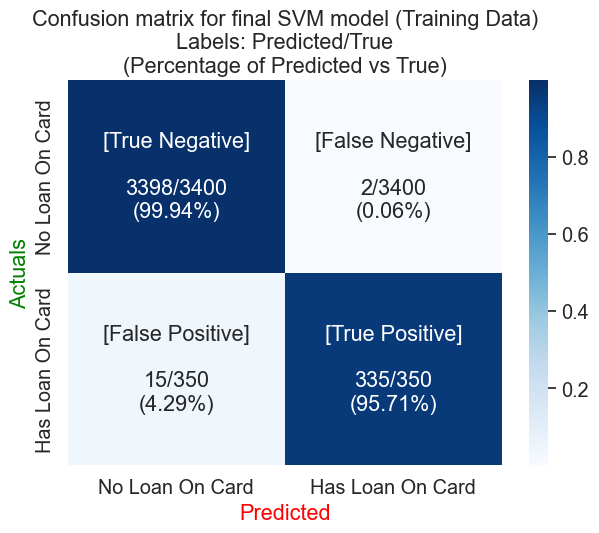

Classification Report of the final model (Training Data): 
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3400
         1.0       0.99      0.96      0.98       350

    accuracy                           1.00      3750
   macro avg       0.99      0.98      0.99      3750
weighted avg       1.00      1.00      1.00      3750



ROC_AUC Score of the final model (Training Data): 0.98

Confusion Matrix of the final model (Test Data): 
 [[1106   14]
 [  37   93]]




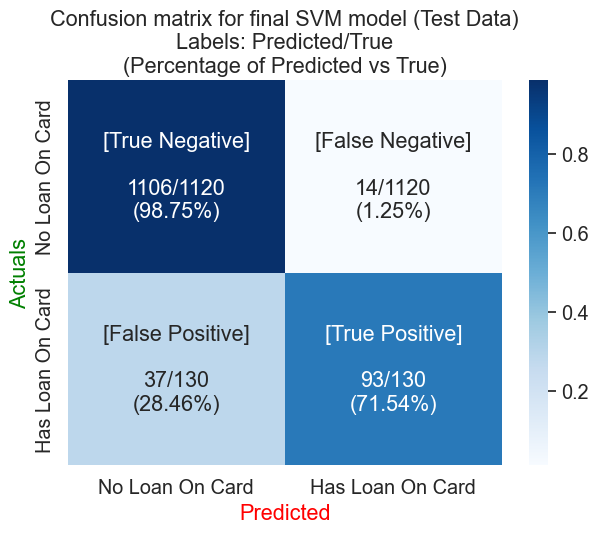

Classification Report of the final model (Test Data): 
               precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      1120
         1.0       0.87      0.72      0.78       130

    accuracy                           0.96      1250
   macro avg       0.92      0.85      0.88      1250
weighted avg       0.96      0.96      0.96      1250



ROC_AUC Score of the final model (Test Data): 0.85


In [46]:
# 4C - Print evaluation metrics for final model.

svm_final = SVC(C=1000, gamma=0.001)
svm_final.fit(X_train, y_train)

#Training data metrics
pred_final = svm_final.predict(X_train)
cm = metrics.confusion_matrix(y_train, pred_final)
print('Confusion Matrix of the final model (Training Data): \n', cm)
print('\n')

#plot confusion matrix
plot_cm(cm, y_train, "Confusion matrix for final SVM model (Training Data)")

print('Classification Report of the final model (Training Data): \n', metrics.classification_report(y_train, pred_final))
print('\n')
print('ROC_AUC Score of the final model (Training Data):', metrics.roc_auc_score(y_train, pred_final).round(2))


print()

#Test data metrics
pred_final = svm_final.predict(X_test)
cm = metrics.confusion_matrix(y_test, pred_final)
print('Confusion Matrix of the final model (Test Data): \n', cm)
print('\n')

#plot confusion matrix
plot_cm(cm, y_test, "Confusion matrix for final SVM model (Test Data)")

print('Classification Report of the final model (Test Data): \n', metrics.classification_report(y_test, pred_final))
print('\n')
print('ROC_AUC Score of the final model (Test Data):', metrics.roc_auc_score(y_test, pred_final).round(2))



Confusion Matrix of the svm base model (Test Data): 
 [[1117    3]
 [ 116   14]]




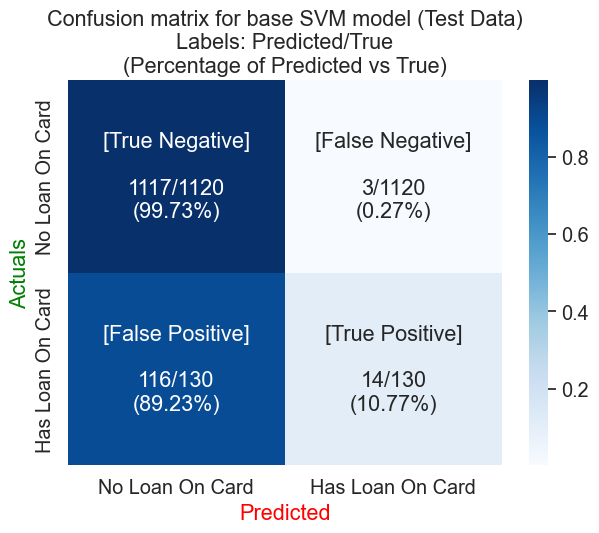

Classification Report of the svm base model (Test Data): 
               precision    recall  f1-score   support

         0.0       0.91      1.00      0.95      1120
         1.0       0.82      0.11      0.19       130

    accuracy                           0.90      1250
   macro avg       0.86      0.55      0.57      1250
weighted avg       0.90      0.90      0.87      1250



ROC_AUC Score of the svm base model (Test Data): 0.55


In [47]:
# 4D - Share improvement achieved from base model to final model.

# Comparision is done using test data performance metrics only

# print evaluation metrics for SVM base model 
pred_svm_base = svm_base_model.predict(X_test)
cm=metrics.confusion_matrix(y_test, pred_svm_base)
print('Confusion Matrix of the svm base model (Test Data): \n', cm)
print('\n')

#plot confusion matrix
plot_cm(cm, y_test, "Confusion matrix for base SVM model (Test Data)")

print('Classification Report of the svm base model (Test Data): \n', metrics.classification_report(y_test, pred_svm_base))
print('\n')
print('ROC_AUC Score of the svm base model (Test Data):', metrics.roc_auc_score(y_test, pred_svm_base).round(2))

Confusion Matrix of the KNN base model (Test Data): 
 [[1091   29]
 [  86   44]]




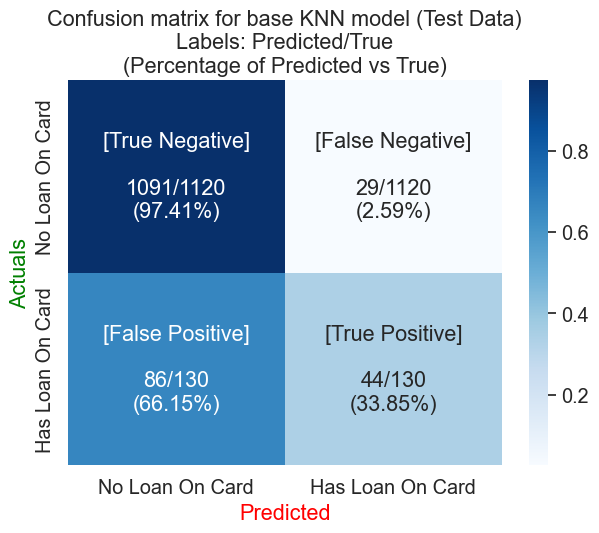

Classification Report of the knn base model (Test Data): 
               precision    recall  f1-score   support

         0.0       0.93      0.97      0.95      1120
         1.0       0.60      0.34      0.43       130

    accuracy                           0.91      1250
   macro avg       0.76      0.66      0.69      1250
weighted avg       0.89      0.91      0.90      1250



ROC_AUC Score of the knn base model (Test Data): 0.66


In [48]:
# print evaluation metrics for KNN base model 
pred_knn_base = knn_base_model.predict(X_test)
cm=metrics.confusion_matrix(y_test, pred_knn_base)
print('Confusion Matrix of the KNN base model (Test Data): \n', cm)
print('\n')

#plot confusion matrix
plot_cm(cm, y_test, "Confusion matrix for base KNN model (Test Data)")

print('Classification Report of the knn base model (Test Data): \n', metrics.classification_report(y_test, pred_knn_base))
print('\n')
print('ROC_AUC Score of the knn base model (Test Data):', metrics.roc_auc_score(y_test, pred_knn_base).round(2))

In [49]:
#Compare base SVM model performance with the final SVM model

def print_improvement(y_test, y_base_pred, y_final_pred, score_mesure, name):
    base_score = score_mesure(y_test, y_base_pred).round(2)
    final_score = score_mesure(y_test, y_final_pred).round(2)
    print("\t{0} Score increased from {1:4.2f} to {2:4.2f} : increase of {3:5.2f}%".format(name,base_score, final_score, (final_score-base_score)*100/base_score))

def print_all_improvements(y_test, y_base_pred, y_final_pred):
    print_improvement(y_test,y_base_pred, y_final_pred, metrics.accuracy_score, "Accuracy")
    print_improvement(y_test,y_base_pred, y_final_pred, metrics.precision_score, "Precision")
    print_improvement(y_test,y_base_pred, y_final_pred, metrics.recall_score, "Recall")
    print_improvement(y_test,y_base_pred, y_final_pred, metrics.f1_score, "F1")
    print_improvement(y_test,y_base_pred, y_final_pred, metrics.roc_auc_score, "ROC_AUC")


#Print improvement %-ages between SVM base model and SVM final model
print("Final SVM Model vs SVM base model (based on Test Data Performance):\n")

print_all_improvements(y_test,pred_svm_base, pred_final)

#Print improvement %-ages between KNN base model and SVM final model
print("\nFinal SVM Model vs KNN base model (based on Test Data Performance):\n")

print_all_improvements(y_test,pred_knn_base, pred_final)

print()
print("*Note: the precision,recall and f1 score above are for the class label 1.0 (has loan on card).")


Final SVM Model vs SVM base model (based on Test Data Performance):

	Accuracy Score increased from 0.90 to 0.96 : increase of  6.67%
	Precision Score increased from 0.82 to 0.87 : increase of  6.10%
	Recall Score increased from 0.11 to 0.72 : increase of 554.55%
	F1 Score increased from 0.19 to 0.78 : increase of 310.53%
	ROC_AUC Score increased from 0.55 to 0.85 : increase of 54.55%

Final SVM Model vs KNN base model (based on Test Data Performance):

	Accuracy Score increased from 0.91 to 0.96 : increase of  5.49%
	Precision Score increased from 0.60 to 0.87 : increase of 45.00%
	Recall Score increased from 0.34 to 0.72 : increase of 111.76%
	F1 Score increased from 0.43 to 0.78 : increase of 81.40%
	ROC_AUC Score increased from 0.66 to 0.85 : increase of 28.79%

*Note: the precision,recall and f1 score above are for the class label 1.0 (has loan on card).


### Summary of Improvements:
- Base models are biased towards majority class (no loan on card), but final model is more balanced.
- Accuracy,Precision, Recall and f1-score has significantly increased in the final model.
- ROC_AUC score has improved significantly as well

